#importing the lib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the data set

In [4]:
client_data = pd.read_csv('client_data (1).csv')
price_data = pd.read_csv('price_data (1).csv')

# data viz/EDA

In [5]:
print("Client Data Shape:", client_data.shape)
print("Price Data Shape:", price_data.shape)
print("\nClient Data Types:")
print(client_data.dtypes)
print("\nPrice Data Types:")
print(price_data.dtypes)

Client Data Shape: (14606, 26)
Price Data Shape: (193002, 8)

Client Data Types:
id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        flo

# as it was mentioned in the video that the data is cleaned

#Feature engg.

In [6]:
# Define the 6 core price columns we want to summarize (converting the data in 12 col to capture the avg and volititly)
price_columns = [
    'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
    'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'
]

In [7]:
# 2. Group by 'id' and calculate mean, max, and min for each customer
price_stats = price_data.groupby('id')[price_columns].agg(['mean', 'max', 'min']).reset_index()

In [8]:
price_stats.head()

id price_off_peak_var                      \
                                                  mean       max       min   
0  0002203ffbb812588b632b9e628cc38d           0.124338  0.128067  0.119906   
1  0004351ebdd665e6ee664792efc4fd13           0.146426  0.148405  0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c           0.181558  0.205742  0.150837   
3  0010ee3855fdea87602a5b7aba8e42de           0.118757  0.123086  0.113068   
4  00114d74e963e47177db89bc70108537           0.147926  0.149902  0.145440   

  price_peak_var                     price_mid_peak_var                      \
            mean       max       min               mean       max       min   
0       0.103794  0.105842  0.101673           0.073160  0.073773  0.070232   
1       0.000000  0.000000  0.000000           0.000000  0.000000  0.000000   
2       0.000000  0.000000  0.000000           0.000000  0.000000  0.000000   
3       0.098292  0.100505  0.095385           0.069032  0.069463  0.068646   
4       0.000000  0.000000  0.000000           0.000000  0.000000  0.000000   

  price_off_peak_fix                       price_peak_fix            \
                mean        max        min           mean       max   
0          40.701732  40.728885  40.565969      24.421038  24.43733   
1          44.385450  44.444710  44.266931       0.000000   0.00000   
2          45.319710  45.944710  44.444710       0.000000   0.00000   
3          40.647427  40.728885  40.565969      24.388455  24.43733   
4          44.266930  44.266931  44.266930       0.000000   0.00000   

             price_mid_peak_fix                        
         min               mean        max        min  
0  24.339581          16.280694  16.291555  16.226389  
1   0.000000           0.000000   0.000000   0.000000  
2   0.000000           0.000000   0.000000   0.000000  
3  24.339578          16.258971  16.291555  16.226383  
4   0.000000           0.000000   0.000000   0.000000

In [9]:
print("\nPrice Data Types:")
print(price_stats.dtypes)


Price Data Types:
id                           object
price_off_peak_var  mean    float64
                    max     float64
                    min     float64
price_peak_var      mean    float64
                    max     float64
                    min     float64
price_mid_peak_var  mean    float64
                    max     float64
                    min     float64
price_off_peak_fix  mean    float64
                    max     float64
                    min     float64
price_peak_fix      mean    float64
                    max     float64
                    min     float64
price_mid_peak_fix  mean    float64
                    max     float64
                    min     float64
dtype: object


In [10]:
# Flatten the multi-level column names (e.g., 'price_peak_var' + 'mean' -> 'price_peak_var_mean')
price_stats.columns = ['_'.join(col).strip('_') for col in price_stats.columns.values]

In [11]:
print("\nPrice Data Types:")
print(price_stats.dtypes)


Price Data Types:
id                          object
price_off_peak_var_mean    float64
price_off_peak_var_max     float64
price_off_peak_var_min     float64
price_peak_var_mean        float64
price_peak_var_max         float64
price_peak_var_min         float64
price_mid_peak_var_mean    float64
price_mid_peak_var_max     float64
price_mid_peak_var_min     float64
price_off_peak_fix_mean    float64
price_off_peak_fix_max     float64
price_off_peak_fix_min     float64
price_peak_fix_mean        float64
price_peak_fix_max         float64
price_peak_fix_min         float64
price_mid_peak_fix_mean    float64
price_mid_peak_fix_max     float64
price_mid_peak_fix_min     float64
dtype: object


In [12]:
# 3. Create our 12 engineered features
final_price_features = pd.DataFrame()

In [13]:
final_price_features['id'] = price_stats['id']

In [14]:
for col in price_columns:
    # Feature 1: The Average (Mean)
    final_price_features[f'{col}_avg'] = price_stats[f'{col}_mean']

    # Feature 2: The Difference/Volatility (Max - Min)
    final_price_features[f'{col}_vol'] = price_stats[f'{col}_max'] - price_stats[f'{col}_min']

In [15]:
final_price_features.head()

,id,price_off_peak_var_avg,price_off_peak_var_vol,price_peak_var_avg,price_peak_var_vol,price_mid_peak_var_avg,price_mid_peak_var_vol,price_off_peak_fix_avg,price_off_peak_fix_vol,price_peak_fix_avg,price_peak_fix_vol,price_mid_peak_fix_avg,price_mid_peak_fix_vol
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.008161,0.103794,0.004169,0.073160,0.003541,40.701732,0.162916,24.421038,0.097749,16.280694,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.004462,0.000000,0.000000,0.000000,0.000000,44.385450,0.177779,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.054905,0.000000,0.000000,0.000000,0.000000,45.319710,1.500000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.010018,0.098292,0.005120,0.069032,0.000817,40.647427,0.162916,24.388455,0.097752,16.258971,0.065172
4,00114d74e963e47177db89bc70108537,0.147926,0.004462,0.000000,0.000000,0.000000,0.000000,44.266930,0.000001,0.000000,0.000000,0.000000,0.000000


In [16]:
print("\nFinal Price Data Types:")
print(final_price_features.dtypes)


Final Price Data Types:
id                         object
price_off_peak_var_avg    float64
price_off_peak_var_vol    float64
price_peak_var_avg        float64
price_peak_var_vol        float64
price_mid_peak_var_avg    float64
price_mid_peak_var_vol    float64
price_off_peak_fix_avg    float64
price_off_peak_fix_vol    float64
price_peak_fix_avg        float64
price_peak_fix_vol        float64
price_mid_peak_fix_avg    float64
price_mid_peak_fix_vol    float64
dtype: object


In [17]:
# 4. Merge these 12 features back into the original Client Data
# We now have 1 row per customer containing both profile info and price summary
final_df_1 = pd.merge(client_data, final_price_features, on='id', how='left')

In [18]:
final_df_1.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_peak_var_avg,price_peak_var_vol,price_mid_peak_var_avg,price_mid_peak_var_vol,price_off_peak_fix_avg,price_off_peak_fix_vol,price_peak_fix_avg,price_peak_fix_vol,price_mid_peak_fix_avg,price_mid_peak_fix_vol
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.100749,0.018480,0.06653,0.073873,40.942265,3.700961,22.35201,24.43733,14.90134,16.291555
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.007124,0.085483,0.00000,0.000000,44.311375,0.177780,0.00000,0.00000,0.00000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088421,0.001281,0.00000,0.000000,44.385450,0.177779,0.00000,0.00000,0.00000,0.000000


In [19]:
print("\nFinal Data frame Types:")
print(final_df_1.dtypes)


Final Data frame Types:
id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up

In [20]:
# 5. Export for training your ML model
final_df_1.to_csv('final_churn_features.csv', index=False)

#Corr. Matrix

In [21]:
# 1. Select only numeric columns (Correlation only works on numbers)
# We exclude 'id' and any categorical/date columns
numeric_df = final_df_1.select_dtypes(include=[np.number])

In [22]:
# 2. Calculate the correlation matrix
corr_matrix = numeric_df.corr()

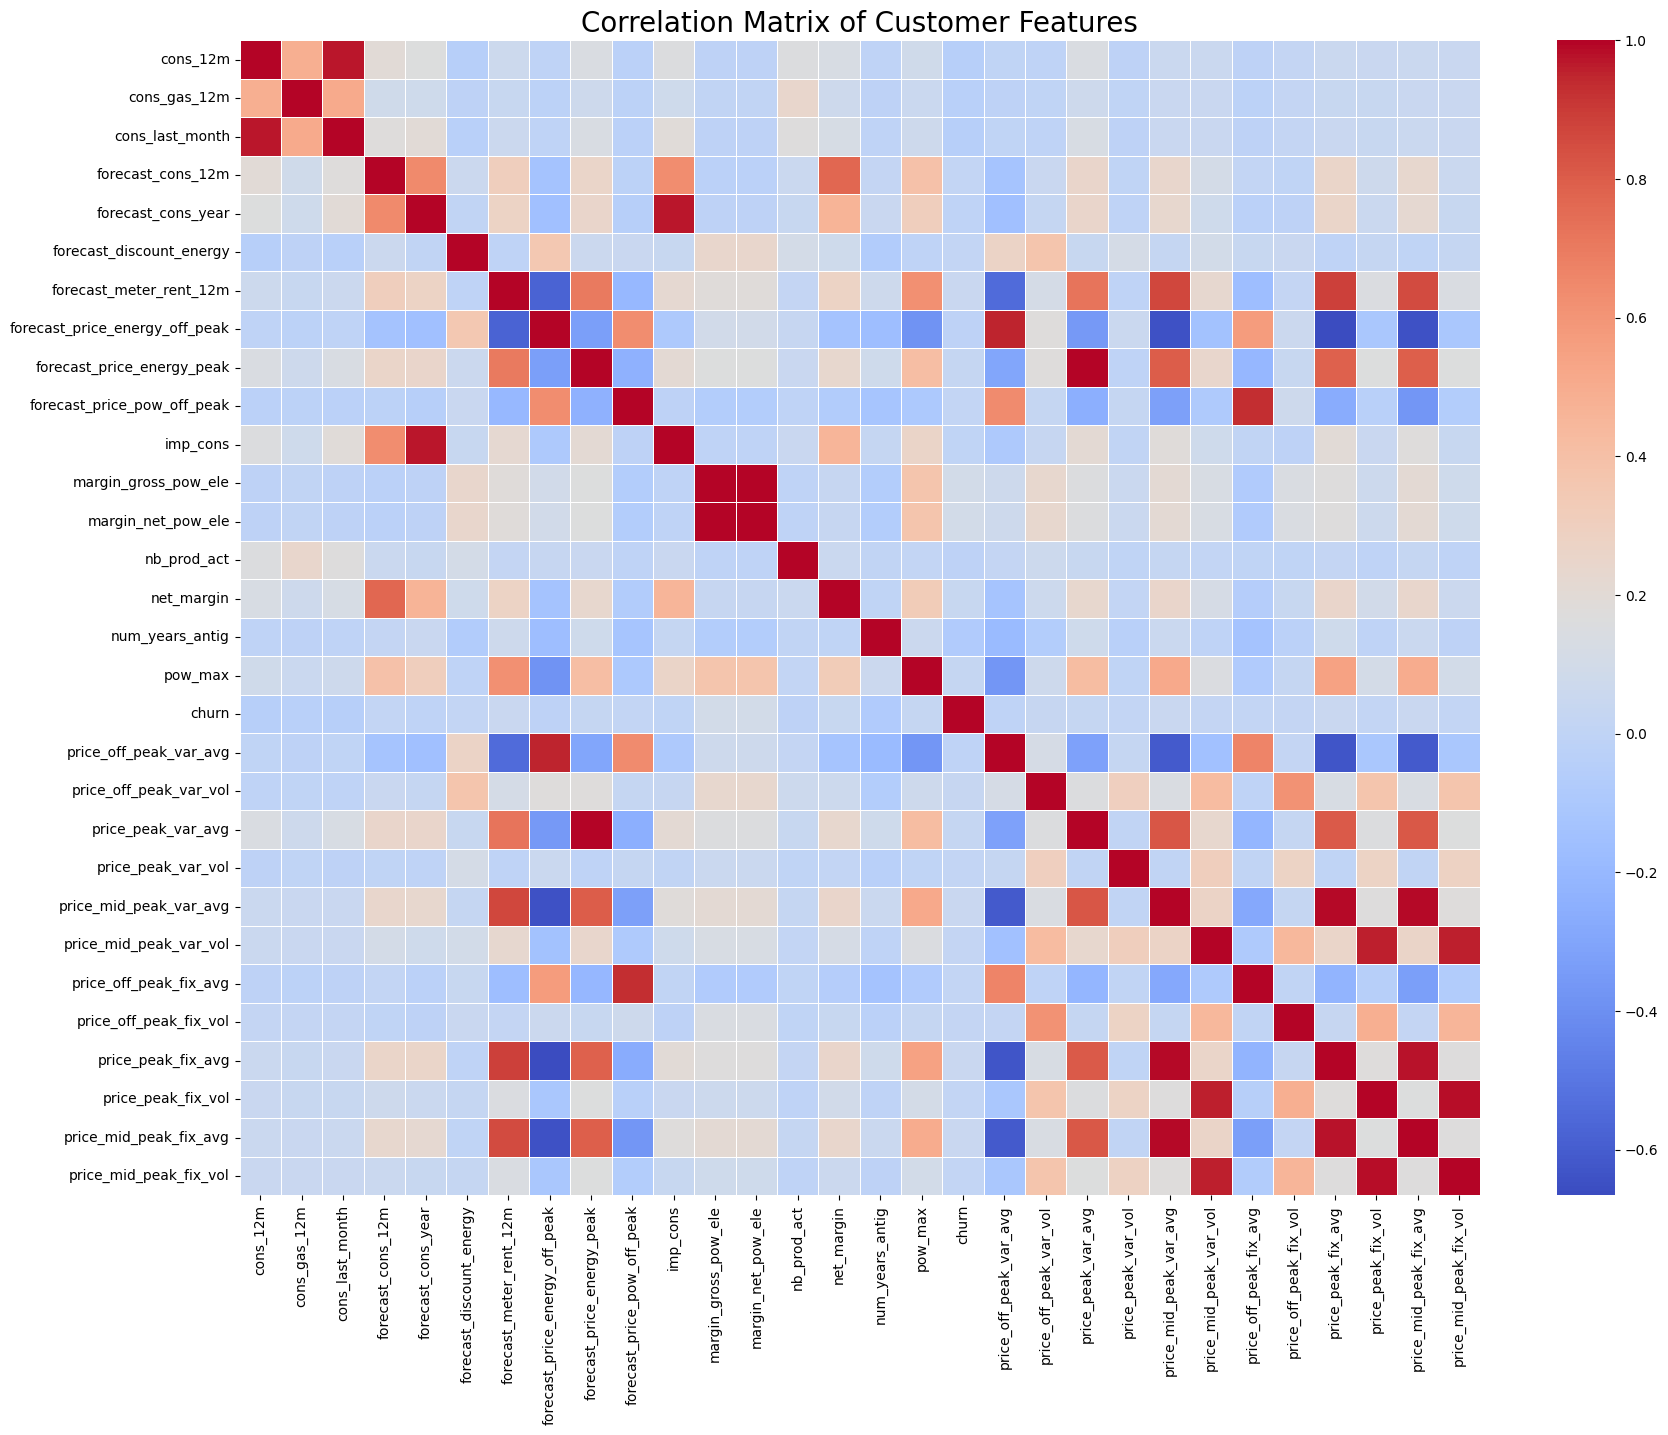

In [23]:
# 3. Create a heatmap to visualize it
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Customer Features', fontsize=20)
plt.savefig('correlation_heatmap.png')

In [24]:
# 2. Select lower triangle of matrix (to avoid duplicates like A-B and B-A)
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=1).astype(bool))

In [25]:
# 3. Find index of feature columns with correlation greater than 0.90
high_corr = [(column, index, lower[column][index])
             for column in lower.columns
             for index in lower.index
             if lower[column][index] > 0.90]

In [26]:
# 4. Print the list
for pair in high_corr:
    print(f"Pair: {pair[0]} & {pair[1]} | Correlation: {pair[2]:.4f}")

Pair: cons_12m & cons_12m | Correlation: 1.0000
Pair: cons_12m & cons_last_month | Correlation: 0.9682
Pair: cons_gas_12m & cons_gas_12m | Correlation: 1.0000
Pair: cons_last_month & cons_last_month | Correlation: 1.0000
Pair: forecast_cons_12m & forecast_cons_12m | Correlation: 1.0000
Pair: forecast_cons_year & forecast_cons_year | Correlation: 1.0000
Pair: forecast_cons_year & imp_cons | Correlation: 0.9694
Pair: forecast_discount_energy & forecast_discount_energy | Correlation: 1.0000
Pair: forecast_meter_rent_12m & forecast_meter_rent_12m | Correlation: 1.0000
Pair: forecast_price_energy_off_peak & forecast_price_energy_off_peak | Correlation: 1.0000
Pair: forecast_price_energy_off_peak & price_off_peak_var_avg | Correlation: 0.9512
Pair: forecast_price_energy_peak & forecast_price_energy_peak | Correlation: 1.0000
Pair: forecast_price_energy_peak & price_peak_var_avg | Correlation: 0.9940
Pair: forecast_price_pow_off_peak & forecast_price_pow_off_peak | Correlation: 1.0000
Pair: f

In [27]:
to_delete = []
for pair in high_corr:
    # If the correlation is exactly 1, skip it
    if pair[2] == 1:
        continue

    # Print the rest
    print(f"Pair: {pair[0]} & {pair[1]} | Correlation: {pair[2]:.4f}")
    # We check 'if' to avoid adding the same column twice
    if pair[1] not in to_delete:
        to_delete.append(pair[1])

Pair: cons_12m & cons_last_month | Correlation: 0.9682
Pair: forecast_cons_year & imp_cons | Correlation: 0.9694
Pair: forecast_price_energy_off_peak & price_off_peak_var_avg | Correlation: 0.9512
Pair: forecast_price_energy_peak & price_peak_var_avg | Correlation: 0.9940
Pair: forecast_price_pow_off_peak & price_off_peak_fix_avg | Correlation: 0.9346
Pair: margin_gross_pow_ele & margin_net_pow_ele | Correlation: 0.9999
Pair: margin_net_pow_ele & margin_gross_pow_ele | Correlation: 0.9999
Pair: price_mid_peak_var_avg & price_peak_fix_avg | Correlation: 0.9877
Pair: price_mid_peak_var_avg & price_mid_peak_fix_avg | Correlation: 0.9915
Pair: price_mid_peak_var_vol & price_peak_fix_vol | Correlation: 0.9583
Pair: price_mid_peak_var_vol & price_mid_peak_fix_vol | Correlation: 0.9600
Pair: price_peak_fix_avg & price_mid_peak_fix_avg | Correlation: 0.9741
Pair: price_peak_fix_vol & price_mid_peak_fix_vol | Correlation: 0.9806


In [28]:
to_delete

['cons_last_month',
 'imp_cons',
 'price_off_peak_var_avg',
 'price_peak_var_avg',
 'price_off_peak_fix_avg',
 'margin_net_pow_ele',
 'margin_gross_pow_ele',
 'price_peak_fix_avg',
 'price_mid_peak_fix_avg',
 'price_peak_fix_vol',
 'price_mid_peak_fix_vol']

In [29]:
# This actually removes the columns from your data
final_df_2 = final_df_1.drop(columns=to_delete)

print(f"Remaining columns: {len(final_df_2.columns)}")

Remaining columns: 27


In [30]:
print(final_df_2.dtypes)

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                          object
pow_max                           float64
churn                               int64
price_off_peak_var_vol            float64
price_peak_var_vol                

In [31]:
final_df_3 = final_df_2.drop(columns=['channel_sales', 'forecast_cons_12m'])

In [32]:
print(final_df_3.dtypes)

id                                 object
cons_12m                            int64
cons_gas_12m                        int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                          object
pow_max                           float64
churn                               int64
price_off_peak_var_vol            float64
price_peak_var_vol                float64
price_mid_peak_var_avg            float64
price_mid_peak_var_vol            

In [33]:
# 1. Convert the date columns to datetime objects
final_df_3['date_activ'] = pd.to_datetime(final_df_3['date_activ'])
final_df_3['date_end'] = pd.to_datetime(final_df_3['date_end'])

# 2. Subtract the dates to get the difference
# We use .dt.days to get just the number of days as an integer
final_df_3['contract_duration_days'] = (final_df_3['date_end'] - final_df_3['date_activ']).dt.days

# 3. Drop the original date columns as they are no longer needed for the model
final_df_4 = final_df_3.drop(columns=['date_activ', 'date_end'])

# Check the result
print(final_df_4[['contract_duration_days']].head())

   contract_duration_days
0                    1096
1                    2566
2                    2192
3                    2192
4                    2245


In [34]:
print(final_df_4.dtypes)

id                                 object
cons_12m                            int64
cons_gas_12m                        int64
date_modif_prod                    object
date_renewal                       object
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                          object
pow_max                           float64
churn                               int64
price_off_peak_var_vol            float64
price_peak_var_vol                float64
price_mid_peak_var_avg            float64
price_mid_peak_var_vol            float64
price_off_peak_fix_vol            float64
contract_duration_days            

In [35]:
final_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   cons_12m                        14606 non-null  int64  
 2   cons_gas_12m                    14606 non-null  int64  
 3   date_modif_prod                 14606 non-null  object 
 4   date_renewal                    14606 non-null  object 
 5   forecast_cons_year              14606 non-null  int64  
 6   forecast_discount_energy        14606 non-null  float64
 7   forecast_meter_rent_12m         14606 non-null  float64
 8   forecast_price_energy_off_peak  14606 non-null  float64
 9   forecast_price_energy_peak      14606 non-null  float64
 10  forecast_price_pow_off_peak     14606 non-null  float64
 11  has_gas                         14606 non-null  object 
 12  nb_prod_act                     

In [36]:
# 1. Start with a fresh copy
final_df_5 = final_df_4.copy()

# 2. Convert dates to datetime
final_df_5['date_modif_prod'] = pd.to_datetime(final_df_5['date_modif_prod'])
final_df_5['date_renewal'] = pd.to_datetime(final_df_5['date_renewal'])

# 3. Handle 'origin_up' with Dummies (since it has many categories)
# Note: I moved 'origin_up' here because you likely wanted dummies for the campaign codes
final_df_5 = pd.get_dummies(final_df_5, columns=['origin_up'], prefix='origin')

# 4. Handle 'has_gas' with Mapping (Simple 0 or 1)
# This keeps it as ONE column named 'has_gas' filled with 0s and 1s
final_df_5['has_gas'] = final_df_5['has_gas'].map({'t': 1, 'f': 0})

# 5. Final Check
print(final_df_5[['has_gas']].head()) # Check the 0/1 values


   has_gas
0        1
1        0
2        0
3        0
4        0


In [37]:
print(final_df_5.columns)

Index(['id', 'cons_12m', 'cons_gas_12m', 'date_modif_prod', 'date_renewal',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn',
       'price_off_peak_var_vol', 'price_peak_var_vol',
       'price_mid_peak_var_avg', 'price_mid_peak_var_vol',
       'price_off_peak_fix_vol', 'contract_duration_days', 'origin_MISSING',
       'origin_ewxeelcelemmiwuafmddpobolfuxioce',
       'origin_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_ldkssxwpmemidmecebumciepifcamkci',
       'origin_lxidpiddsbxsbosboudacockeimpuepw',
       'origin_usapbepcfoloekilkwsdiboslwaxobdp'],
      dtype='object')


In [38]:
final_df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   id                                       14606 non-null  object        
 1   cons_12m                                 14606 non-null  int64         
 2   cons_gas_12m                             14606 non-null  int64         
 3   date_modif_prod                          14606 non-null  datetime64[ns]
 4   date_renewal                             14606 non-null  datetime64[ns]
 5   forecast_cons_year                       14606 non-null  int64         
 6   forecast_discount_energy                 14606 non-null  float64       
 7   forecast_meter_rent_12m                  14606 non-null  float64       
 8   forecast_price_energy_off_peak           14606 non-null  float64       
 9   forecast_price_energy_peak             

In [39]:
final_df_6 = final_df_5.drop('origin_MISSING', axis=1)

In [40]:
final_df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   id                                       14606 non-null  object        
 1   cons_12m                                 14606 non-null  int64         
 2   cons_gas_12m                             14606 non-null  int64         
 3   date_modif_prod                          14606 non-null  datetime64[ns]
 4   date_renewal                             14606 non-null  datetime64[ns]
 5   forecast_cons_year                       14606 non-null  int64         
 6   forecast_discount_energy                 14606 non-null  float64       
 7   forecast_meter_rent_12m                  14606 non-null  float64       
 8   forecast_price_energy_off_peak           14606 non-null  float64       
 9   forecast_price_energy_peak             

In [41]:
final_df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   id                                       14606 non-null  object        
 1   cons_12m                                 14606 non-null  int64         
 2   cons_gas_12m                             14606 non-null  int64         
 3   date_modif_prod                          14606 non-null  datetime64[ns]
 4   date_renewal                             14606 non-null  datetime64[ns]
 5   forecast_cons_year                       14606 non-null  int64         
 6   forecast_discount_energy                 14606 non-null  float64       
 7   forecast_meter_rent_12m                  14606 non-null  float64       
 8   forecast_price_energy_off_peak           14606 non-null  float64       
 9   forecast_price_energy_peak             

In [42]:
final_df_6.head()

,id,cons_12m,cons_gas_12m,date_modif_prod,date_renewal,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,price_peak_var_vol,price_mid_peak_var_avg,price_mid_peak_var_vol,price_off_peak_fix_vol,contract_duration_days,origin_ewxeelcelemmiwuafmddpobolfuxioce,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,origin_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,2015-11-01,2015-06-23,0,0.0,1.78,0.114481,0.098142,...,0.018480,0.066530,0.073873,3.700961,1096,False,False,False,True,False
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,2009-08-21,2015-08-31,0,0.0,16.27,0.145711,0.000000,...,0.085483,0.000000,0.000000,0.177780,2566,False,True,False,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,2010-04-16,2015-04-17,0,0.0,38.72,0.165794,0.087899,...,0.001281,0.000000,0.000000,0.177779,2192,False,True,False,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,2010-03-30,2015-03-31,0,0.0,19.83,0.146694,0.000000,...,0.000000,0.000000,0.000000,0.177779,2192,False,True,False,False,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,2010-01-13,2015-03-09,526,0.0,131.73,0.116900,0.100015,...,0.004169,0.072865,0.003541,0.162916,2245,False,True,False,False,False


In [43]:
# Extract the month as a simple number as neural network does'nt read date.
final_df_6['month_modif'] = final_df_6['date_modif_prod'].dt.month
final_df_6['month_renewal'] = final_df_6['date_renewal'].dt.month

In [44]:
# 2. Drop the original columns
final_df_6 = final_df_6.drop(columns=['date_modif_prod', 'date_renewal'],axis=1)

# 3. Check that it worked
final_df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       14606 non-null  object 
 1   cons_12m                                 14606 non-null  int64  
 2   cons_gas_12m                             14606 non-null  int64  
 3   forecast_cons_year                       14606 non-null  int64  
 4   forecast_discount_energy                 14606 non-null  float64
 5   forecast_meter_rent_12m                  14606 non-null  float64
 6   forecast_price_energy_off_peak           14606 non-null  float64
 7   forecast_price_energy_peak               14606 non-null  float64
 8   forecast_price_pow_off_peak              14606 non-null  float64
 9   has_gas                                  14606 non-null  int64  
 10  nb_prod_act                              14606

**Train test Split** (Since only 10% data is churned we will do a statified split)

In [45]:
Data_frame=final_df_6.drop('id',axis='columns')

In [46]:
X = Data_frame.drop('churn',axis='columns')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   cons_12m                                 14606 non-null  int64  
 1   cons_gas_12m                             14606 non-null  int64  
 2   forecast_cons_year                       14606 non-null  int64  
 3   forecast_discount_energy                 14606 non-null  float64
 4   forecast_meter_rent_12m                  14606 non-null  float64
 5   forecast_price_energy_off_peak           14606 non-null  float64
 6   forecast_price_energy_peak               14606 non-null  float64
 7   forecast_price_pow_off_peak              14606 non-null  float64
 8   has_gas                                  14606 non-null  int64  
 9   nb_prod_act                              14606 non-null  int64  
 10  net_margin                               14606

In [47]:
y=Data_frame['churn']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14606 entries, 0 to 14605
Series name: churn
Non-Null Count  Dtype
--------------  -----
14606 non-null  int64
dtypes: int64(1)
memory usage: 114.2 KB


In [48]:
from sklearn.model_selection import train_test_split
# The 'stratify=y' is the magic part!
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=5,
    stratify=y
)

# Verify the split ratio
print(f"Churn rate in training: {y_train.mean():.2%}")
print(f"Churn rate in testing: {y_test.mean():.2%}")

Churn rate in training: 9.71%
Churn rate in testing: 9.72%


to fix the fix the imbalance in the data set

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [51]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21098 entries, 0 to 21097
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   cons_12m                                 21098 non-null  int64  
 1   cons_gas_12m                             21098 non-null  int64  
 2   forecast_cons_year                       21098 non-null  int64  
 3   forecast_discount_energy                 21098 non-null  float64
 4   forecast_meter_rent_12m                  21098 non-null  float64
 5   forecast_price_energy_off_peak           21098 non-null  float64
 6   forecast_price_energy_peak               21098 non-null  float64
 7   forecast_price_pow_off_peak              21098 non-null  float64
 8   has_gas                                  21098 non-null  int64  
 9   nb_prod_act                              21098 non-null  int64  
 10  net_margin                               21098

In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 6283 to 13364
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   cons_12m                                 2922 non-null   int64  
 1   cons_gas_12m                             2922 non-null   int64  
 2   forecast_cons_year                       2922 non-null   int64  
 3   forecast_discount_energy                 2922 non-null   float64
 4   forecast_meter_rent_12m                  2922 non-null   float64
 5   forecast_price_energy_off_peak           2922 non-null   float64
 6   forecast_price_energy_peak               2922 non-null   float64
 7   forecast_price_pow_off_peak              2922 non-null   float64
 8   has_gas                                  2922 non-null   int64  
 9   nb_prod_act                              2922 non-null   int64  
 10  net_margin                               2922 non

Creating an Neural Network and traing it

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(26,)),
    layers.Dense(20, activation='relu'),

    # Output layer (Sigmoid is perfect for binary churn: 0 or 1,and softmax for multple)
    layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. Check the structure
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21098 entries, 0 to 21097
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   cons_12m                                 21098 non-null  int64  
 1   cons_gas_12m                             21098 non-null  int64  
 2   forecast_cons_year                       21098 non-null  int64  
 3   forecast_discount_energy                 21098 non-null  float64
 4   forecast_meter_rent_12m                  21098 non-null  float64
 5   forecast_price_energy_off_peak           21098 non-null  float64
 6   forecast_price_energy_peak               21098 non-null  float64
 7   forecast_price_pow_off_peak              21098 non-null  float64
 8   has_gas                                  21098 non-null  int64  
 9   nb_prod_act                              21098 non-null  int64  
 10  net_margin                               21098

In [58]:
model.fit(X_train_res,y_train_res,epochs=100)

Epoch 1/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5163 - loss: 229.5154
Epoch 2/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5133 - loss: 155.3765
Epoch 3/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5267 - loss: 178.4400
Epoch 4/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5321 - loss: 121.0518
Epoch 5/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5318 - loss: 141.0883
Epoch 6/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5242 - loss: 160.8866
Epoch 7/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5353 - loss: 95.3950
Epoch 8/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5430 - loss: 110.6386
Epoch 9/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5408 - loss: 142.6731
Epoch 10/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5478 - loss: 114.5078
Epoch 11/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5440 - loss: 109.0577
Epoch 12/100
660/660

Model Evaluation and prediction

In [60]:
model.evaluate(X_test,y_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5915 - loss: 36.2650


[38.99785232543945, 0.5920602083206177]

In [61]:
yp=model.predict(X_test)
yp[:5]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.00000000e+00],
       [1.00000000e+00],
       [3.15174237e-02],
       [1.16561704e-32],
       [6.48335257e-26]], dtype=float32)

In [62]:
y_test[:5]

,churn
6283,0
7036,0
13451,0
3165,1
14066,0


In [63]:
y_pred=[]

In [64]:
for ele in yp:
  if ele >0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [65]:
y_pred[:10]

[1, 1, 0, 0, 0, 0, 0, 0, 1, 1]

Model Evaluation

In [66]:
from sklearn.metrics import confusion_matrix
print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

--- Confusion Matrix ---
[[1593 1045]
 [ 147  137]]


In [67]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.60      0.73      2638
           1       0.12      0.48      0.19       284

    accuracy                           0.59      2922
   macro avg       0.52      0.54      0.46      2922
weighted avg       0.84      0.59      0.68      2922



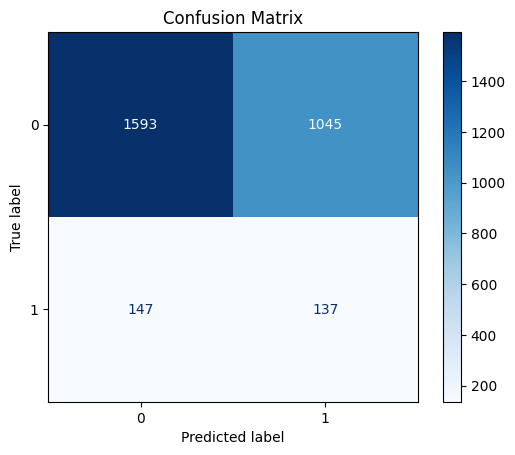

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Create the plot from your predictions
# Replace 'target_names' with your actual class labels if you have them
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

# 2. Add a title (optional)
plt.title("Confusion Matrix")

# 3. Save the file
plt.savefig('Confusion_Matrix.png', dpi=300, bbox_inches='tight')

# 4. Show the plot (optional)
plt.show()

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=5
)

rf.fit(X_train_res, y_train_res)


RandomForestClassifier(n_estimators=200, random_state=5)

In [71]:
y_pred_2 = rf.predict(X_test)


In [73]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2638
           1       0.45      0.08      0.14       284

    accuracy                           0.90      2922
   macro avg       0.68      0.54      0.54      2922
weighted avg       0.86      0.90      0.87      2922



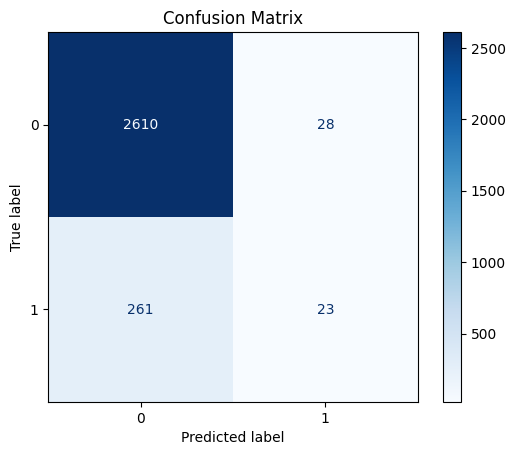

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Create the plot from your predictions
# Replace 'target_names' with your actual class labels if you have them
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2, cmap=plt.cm.Blues)

# 2. Add a title (optional)
plt.title("Confusion Matrix")

# 3. Save the file
plt.savefig('Confusion_Matrix.png', dpi=300, bbox_inches='tight')

# 4. Show the plot (optional)
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)


In [78]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_pred)
    }


In [79]:
results = []

results.append(evaluate_model(y_test, y_pred, "Neural Network"))
results.append(evaluate_model(y_test, y_pred_2, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_lr, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))

import pandas as pd
results_df = pd.DataFrame(results)
results_df.sort_values(by="Recall", ascending=False)


,Model,Recall,Precision,F1,ROC-AUC
2,Logistic Regression,0.598592,0.125461,0.207444,0.574694
0,Neural Network,0.482394,0.115905,0.186903,0.543130
3,XGBoost,0.271127,0.181604,0.217514,0.569794
1,Random Forest,0.080986,0.450980,0.137313,0.535186


Logistc regression is choosen because:
Logistic Regression is the most well-rounded model here.
It leads on Recall and ROC-AUC, and has the second-best F1. That said, all four models have low F1 scores and ROC-AUC values only modestly above 0.5 (random chance), which suggests the bigger issue may be feature engineering, class imbalance, or data quality rather than model choice. It might be worth addressing those before committing to a model.